### Data Exploration

In [72]:
import pandas as pd
import gzip
import json

def parse(path):
  g = gzip.open(path, 'rb')
  for l in g:
    yield json.loads(l)

def getDF(path):
  i = 0
  df = {}
  for d in parse(path):
    df[i] = d
    i += 1
  return pd.DataFrame.from_dict(df, orient='index')

df = getDF('/content/drive/MyDrive/Centennial/NLP/Office_Products_5.json.gz')

In [73]:
df

,overall,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,vote,image
0,4.0,True,"11 7, 2017",A2NIJTYWADLK57,0140503528,{'Format:': ' Board book'},cotton clay,kids like story BUT while i really wanted a bo...,"good story, small size book though",1510012800,NaN,NaN
1,4.0,True,"03 7, 2017",A2827D8EEURMP4,0140503528,{'Format:': ' Hardcover'},emankcin,Bought this used and it came in great conditio...,Good,1488844800,NaN,NaN
2,5.0,True,"06 25, 2016",APB6087F4J09J,0140503528,{'Format:': ' Board book'},Starbucks Fan,Every story and book about Corduroy is Fantast...,Best Books for All Children,1466812800,NaN,NaN
3,5.0,True,"02 21, 2016",A2DHERRZIPFU7X,0140503528,{'Format:': ' Paperback'},Caitlyn Jacobson,I purchased this book for my first grade class...,Great for Math!,1456012800,NaN,NaN
4,5.0,False,"08 2, 2015",A2XCLJRGFANRC,0140503528,{'Format:': ' Hardcover'},E. Ervin,Having spent numerous years in an elementary s...,Love Corduroy,1438473600,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
800352,5.0,True,"09 9, 2017",ACHG5QICJCS1F,B01HHLLLIO,{'Size:': ' 6 Rolls'},Anky,Delivered on time and is as expected.,5 stars,1504915200,NaN,NaN
800353,5.0,True,"06 2, 2017",A1YB5J8SF6QX3L,B01HHLLLIO,{'Size:': ' 6 Rolls'},DM,worked great.,good stuff,1496361600,NaN,NaN
800354,5.0,True,"04 29, 2017",A3N4O7L4HBYJX4,B01HHLLLIO,{'Size:': ' 6 Rolls'},Verdant Treasures,I used to score free UPS 4x6 labels. The blac...,Couldn't be happier with these labels,1493424000,NaN,NaN
800355,5.0,True,"02 21, 2017",A2DR3CXSWWLYXY,B01HHLLLIO,{'Size:': ' 6 Rolls'},C. F.,great,Five Stars,1487635200,NaN,NaN


This Dataset is an updated version of the Amazon review dataset released in 2014. As in the previous version, this dataset includes reviews (ratings, text, helpfulness votes), product metadata (descriptions, category information, price, brand, and image features), and links (also viewed/also bought graphs). In addition, this version provides the following features:

More reviews:
The total number of reviews is 233.1 million (142.8 million in 2014).
Newer reviews:
Current data includes reviews in the range May 1996 - Oct 2018.
Metadata:
We have added transaction metadata for each review shown on the review page. Such information includes:
Product information, e.g. color (white or black), size (large or small), package type (hardcover or electronics), etc.
Product images that are taken after the user received the product.
Added more detailed metadata of the product landing page. Such detailed information includes:
Bullet-point descriptions under product title.
Technical details table (attribute-value pairs).
Similar products table.
More categories:
Includes 5 new product categories.

Source: https://nijianmo.github.io/amazon/index.html#code

In [74]:
df.shape

(800357, 12)

In [75]:
df.columns

Index(['overall', 'verified', 'reviewTime', 'reviewerID', 'asin', 'style',
       'reviewerName', 'reviewText', 'summary', 'unixReviewTime', 'vote',
       'image'],
      dtype='object')

In [76]:
counts_of_reviews_per_product = df.groupby('asin').size()
for product, count_of_reviews_per_product in counts_of_reviews_per_product.iteritems():
  print(f'{product} has {count_of_reviews_per_product} reviews')
# counts_of_reviews_per_product

Streaming output truncated to the last 5000 lines.
B00WIG9RNU has 6 reviews
B00WIKV5U4 has 5 reviews
B00WIRXNL6 has 31 reviews
B00WIXUHUK has 18 reviews
B00WJ2V85S has 21 reviews
B00WJDWG3A has 130 reviews
B00WJDWG62 has 16 reviews
B00WJDWGA8 has 164 reviews
B00WJI61SG has 69 reviews
B00WJKOQL8 has 6 reviews
B00WKNPVS6 has 5 reviews
B00WKYLBSE has 5 reviews
B00WKYMZPC has 11 reviews
B00WKZ3SE8 has 5 reviews
B00WKZ3Y88 has 17 reviews
B00WKZ3Z1E has 21 reviews
B00WKZ5A76 has 19 reviews
B00WKZH21I has 10 reviews
B00WKZJT5U has 14 reviews
B00WKZKCVA has 10 reviews
B00WKZL4EE has 43 reviews
B00WKZLD2C has 69 reviews
B00WKZLWD2 has 7 reviews
B00WKZM2CW has 5 reviews
B00WKZMDZI has 9 reviews
B00WL2NDJU has 17 reviews
B00WL2NM0K has 13 reviews
B00WL2OSDK has 5 reviews
B00WL2P22G has 9 reviews
B00WL2PEEW has 9 reviews
B00WL2RFGM has 5 reviews
B00WL39VF4 has 6 reviews
B00WL5K9YE has 16 reviews
B00WL5PDU4 has 5 reviews
B00WLK2IYI has 6 reviews
B00WLK2OX8 has 9 reviews
B00WLO64GW has 73 reviews
B0

In [77]:
len(counts_of_reviews_per_product)

27965

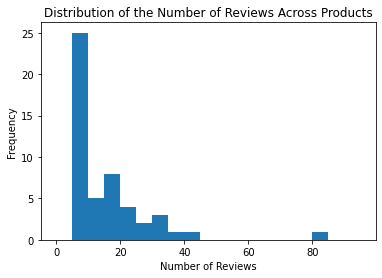

In [78]:
import matplotlib.pyplot as plt
import numpy as np

# Plot the distribution using matplotlib.pyplot.hist() function.
plt.hist(counts_of_reviews_per_product[:50], bins=np.arange(0, 100, 5))
plt.xlabel('Number of Reviews')
plt.ylabel('Frequency')
plt.title('Distribution of the Number of Reviews Across Products')
plt.show()

In [79]:
counts_of_reviews_per_product[:10]

asin
0140503528    11
0310432065    15
0310520347    22
0310802636    19
0310806607    16
0310806615     8
0310818605     7
0310818621     9
0310821800    22
0310823706    15
dtype: int64

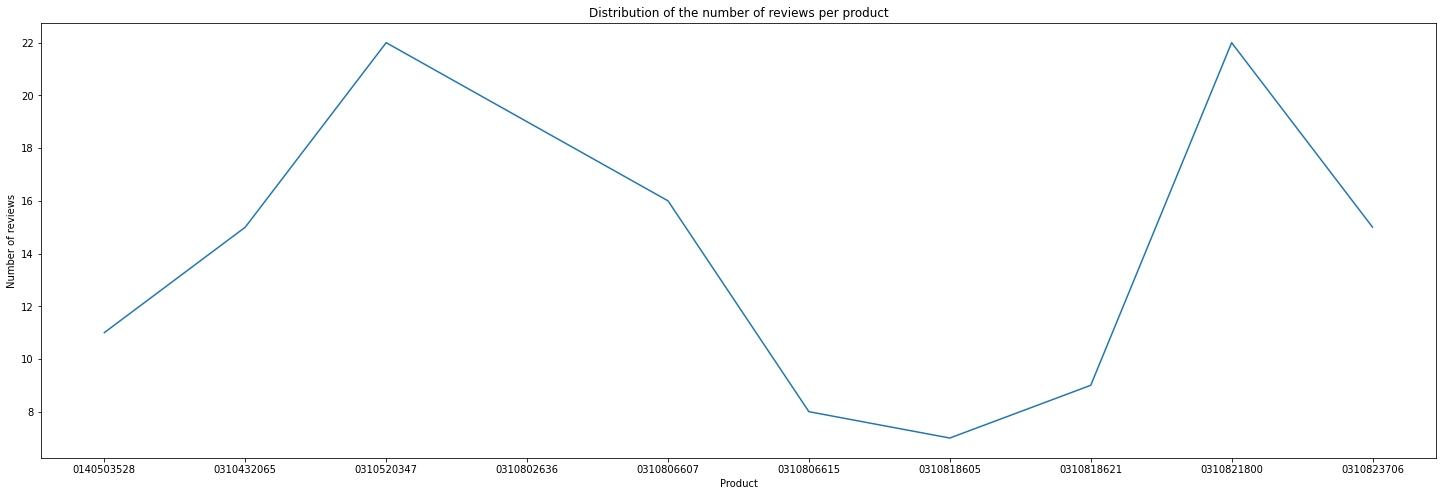

In [80]:
plt.figure(figsize=(25,8))
plt.plot(counts_of_reviews_per_product[:10])
plt.xlabel('Product')
plt.ylabel('Number of reviews')
plt.title('Distribution of the number of reviews per product')
plt.show()

In [81]:
counts_of_reviews_across_products = df.groupby(['asin', 'overall']).size()
# for product, count_of_reviews_per_product in counts_of_reviews_per_product.iteritems():
#   print(f'{product} has {count_of_reviews_per_product} reviews')
counts_of_reviews_across_products[:10]

asin        overall
0140503528  4.0         2
            5.0         9
0310432065  3.0         2
            4.0         2
            5.0        11
0310520347  3.0         1
            4.0         3
            5.0        18
0310802636  3.0         1
            4.0         3
dtype: int64

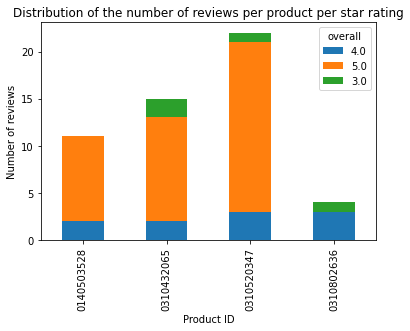

In [82]:
# Unstack the data to create a pivot table with product ids as rows and review ratings as columns
reviews_by_product_and_rating = counts_of_reviews_across_products[:10].unstack()

# Plot the distribution of the number of reviews per product per star rating as a histogram
reviews_by_product_and_rating.plot(kind='bar', stacked=True)
plt.xlabel('Product ID')
plt.ylabel('Number of reviews')
plt.title('Distribution of the number of reviews per product per star rating')
plt.show()

In [83]:
counts_of_reviews_per_user = df.groupby('reviewerID').size()
for user, count_of_review in counts_of_reviews_per_user.iteritems():
  print(f'{user} has {count_of_review} reviews')

Streaming output truncated to the last 5000 lines.
AT6KJ6BR2IR4R has 6 reviews
AT6L0WKUPEZ3U has 5 reviews
AT6QJVZ5ENHRE has 10 reviews
AT6R2P9NNL26Q has 7 reviews
AT6T88EKDEM7V has 7 reviews
AT6U2Y48ALUJS has 8 reviews
AT6Z3MWVF4ARF has 5 reviews
AT71T5IJS0A54 has 6 reviews
AT7260JB73O3J has 7 reviews
AT758YHM6A195 has 10 reviews
AT75G0S1JMRZM has 5 reviews
AT76U93AB2A8O has 8 reviews
AT79H02N7TEO0 has 5 reviews
AT7AJ93SJ6EIC has 5 reviews
AT7C4BDSU4872 has 5 reviews
AT7EHDR7TQSKI has 7 reviews
AT7N2YQ5AH4S1 has 16 reviews
AT7RS1GMZCSUM has 5 reviews
AT7SW6UCLPC0V has 5 reviews
AT7SWU1FEDQWM has 6 reviews
AT7T425LWT51N has 9 reviews
AT7VVNAQ1LZOE has 7 reviews
AT7Y21TFQ2UP4 has 5 reviews
AT7Y341WJWBX2 has 8 reviews
AT7YI8KMZJEMF has 5 reviews
AT7YUBA5IMVY5 has 6 reviews
AT83Y7UH3YYME has 7 reviews
AT85476B56WQP has 6 reviews
AT8BKNP2P7GEG has 5 reviews
AT8EVA4A6NO3Y has 6 reviews
AT8GJA6LMNOZP has 6 reviews
AT8H31ZZF0FLK has 14 reviews
AT8H8YTE2L1IC has 6 reviews
AT8IOCMWZYKLN has 7 r

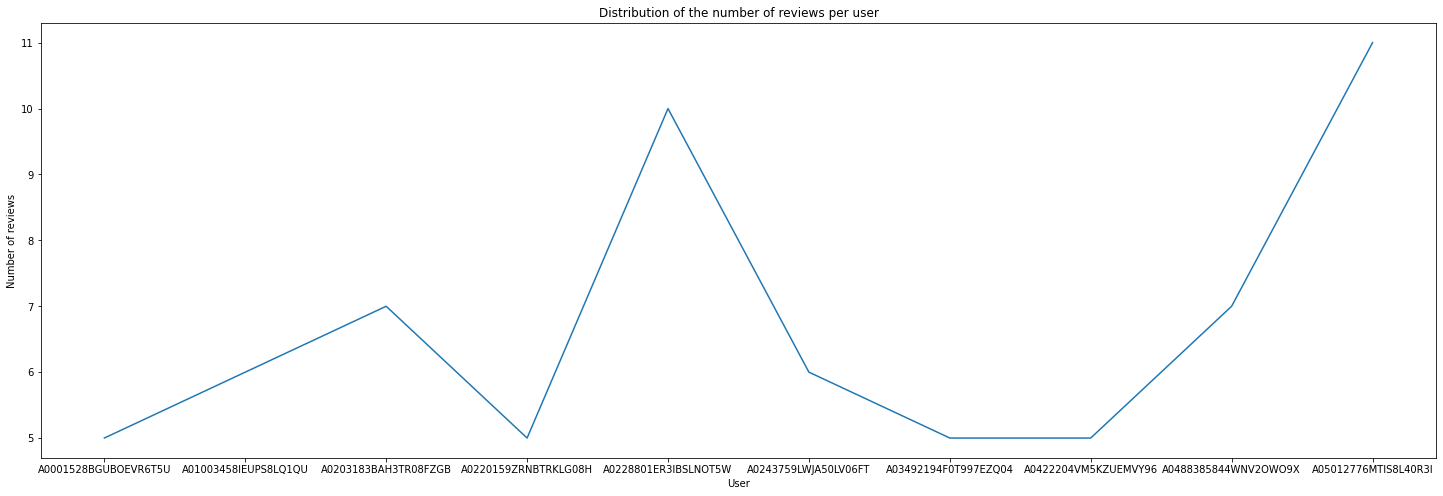

In [84]:
plt.figure(figsize=(25,8))
plt.plot(counts_of_reviews_per_user[:10])
plt.xlabel('User')
plt.ylabel('Number of reviews')
plt.title('Distribution of the number of reviews per user')
plt.show()

In [141]:
positive = df[df['overall'] > 3]
negative = df[df['overall'] < 3]
positive = positive.dropna()
negative = negative.dropna()

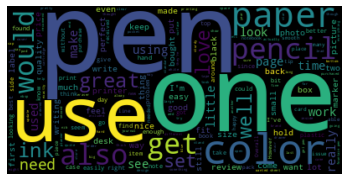

In [142]:
# common words in positive review comments
import nltk
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from wordcloud import WordCloud

stopwords = set(stopwords.words('english'))
stopwords.update(["br", "stuff", "href","taste", "product", "flavour","like", "coffee", "dog","flavor","buy"]) 

pos = " ".join(review for review in positive.reviewText)
wordcloud = WordCloud(stopwords=stopwords).generate(pos)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

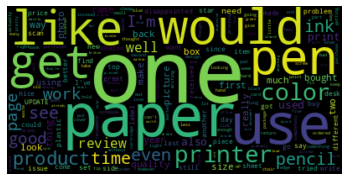

In [143]:
# common words in negative review comments
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
stopwords = set(stopwords.words('english'))
negreviews = " ".join(review for review in negative.reviewText)
wordcloud = WordCloud(stopwords=stopwords).generate(negreviews)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [85]:
df['reviewText']

0         kids like story BUT while i really wanted a bo...
1         Bought this used and it came in great conditio...
2         Every story and book about Corduroy is Fantast...
3         I purchased this book for my first grade class...
4         Having spent numerous years in an elementary s...
                                ...                        
800352                Delivered on time and is as expected.
800353                                        worked great.
800354    I used to score free UPS 4x6 labels.  The blac...
800355                                                great
800356    Struggled finding a sharpener and they didn't ...
Name: reviewText, Length: 800357, dtype: object

### Pre-processing

In [123]:
import random
n_samples = random.randint(500, 1000)
df_random = df.sample(n=n_samples)

In [125]:
df_random.shape

(624, 12)

In [126]:
df_random

,overall,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,vote,image
750371,1.0,True,"02 8, 2016",ARXCBLMK5TK8Z,B0006OM436,{'Color:': ' Clear'},ShadyLady,If you want a smooth writing surface under you...,not a smooth surface,1454889600,2,NaN
389750,2.0,True,"10 13, 2015",A1DIFL0333QPEB,B003S7ASEU,"{'Size:': ' 1 Pack', 'Color:': ' Black Vinyl/B...",Mark T. Brody,This is one of very few times customer reviews...,Amazon Reviews failed me,1444694400,20,NaN
620342,5.0,True,"12 5, 2016",A313A0DJPGDLG3,B00OS3Q64E,NaN,Judy K. Tate,I am making my own Christmas Cards this year a...,Great Blank Cards,1480896000,NaN,NaN
147504,5.0,True,"10 20, 2014",A1XLQVX3EOQ6BC,B000BM6H9U,"{'Size:': ' 5-Pack', 'Color:': ' Assorted Colo...",book reader,"Perfect for writing on glass, I have black pap...",Five Stars,1413763200,NaN,NaN
256501,5.0,False,"03 11, 2015",A1I6U5AQAT3ZG9,B000WA3JJC,NaN,E. B. MULLIGAN,Prints one card per sheet. Perfect for dinner ...,Compatible with all inkjet and laser printers,1426032000,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
440432,4.0,True,"02 2, 2015",A3HDC0WP2X3TF5,B005J7Y6GS,{'Style:': ' LW-400'},Caroll,Works well but confusing to program in desired...,Difficult to figure out how to use it.,1422835200,NaN,NaN
304270,5.0,True,"07 14, 2015",A27E1MN49JC03C,B000GOYIDA,"{'Size:': ' 4 Pack', 'Color:': ' White', 'Styl...",E. Flores,these are the best erasers for someone who ske...,Five Stars,1436832000,NaN,NaN
705715,5.0,True,"08 17, 2016",A198C8FDGJNM9S,B019OZVO06,{'Color:': ' Blue Ink'},Riv2359,These are my favorite pens. I keep them in stock!,Five Stars,1471392000,NaN,NaN
369308,4.0,False,"06 7, 2011",A1NVK25SNU2BOM,B002K9KEKK,NaN,Kay Mackenzie,I'm a quilter and I got these thinking I would...,"Yep, they remove",1307404800,NaN,NaN


In [127]:
def condition(overall):
  # print(df)
  rating = overall
  if rating in (4.0, 5.0):
    return 'Positive'
  elif rating == 3.0:
    return 'Neutral'
  elif rating in (1.0, 2.0):
    return 'Negative'

df_random['label'] = df_random['overall'].apply(condition)

In [128]:
df_random

,overall,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,vote,image,label
750371,1.0,True,"02 8, 2016",ARXCBLMK5TK8Z,B0006OM436,{'Color:': ' Clear'},ShadyLady,If you want a smooth writing surface under you...,not a smooth surface,1454889600,2,NaN,Negative
389750,2.0,True,"10 13, 2015",A1DIFL0333QPEB,B003S7ASEU,"{'Size:': ' 1 Pack', 'Color:': ' Black Vinyl/B...",Mark T. Brody,This is one of very few times customer reviews...,Amazon Reviews failed me,1444694400,20,NaN,Negative
620342,5.0,True,"12 5, 2016",A313A0DJPGDLG3,B00OS3Q64E,NaN,Judy K. Tate,I am making my own Christmas Cards this year a...,Great Blank Cards,1480896000,NaN,NaN,Positive
147504,5.0,True,"10 20, 2014",A1XLQVX3EOQ6BC,B000BM6H9U,"{'Size:': ' 5-Pack', 'Color:': ' Assorted Colo...",book reader,"Perfect for writing on glass, I have black pap...",Five Stars,1413763200,NaN,NaN,Positive
256501,5.0,False,"03 11, 2015",A1I6U5AQAT3ZG9,B000WA3JJC,NaN,E. B. MULLIGAN,Prints one card per sheet. Perfect for dinner ...,Compatible with all inkjet and laser printers,1426032000,NaN,NaN,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...
440432,4.0,True,"02 2, 2015",A3HDC0WP2X3TF5,B005J7Y6GS,{'Style:': ' LW-400'},Caroll,Works well but confusing to program in desired...,Difficult to figure out how to use it.,1422835200,NaN,NaN,Positive
304270,5.0,True,"07 14, 2015",A27E1MN49JC03C,B000GOYIDA,"{'Size:': ' 4 Pack', 'Color:': ' White', 'Styl...",E. Flores,these are the best erasers for someone who ske...,Five Stars,1436832000,NaN,NaN,Positive
705715,5.0,True,"08 17, 2016",A198C8FDGJNM9S,B019OZVO06,{'Color:': ' Blue Ink'},Riv2359,These are my favorite pens. I keep them in stock!,Five Stars,1471392000,NaN,NaN,Positive
369308,4.0,False,"06 7, 2011",A1NVK25SNU2BOM,B002K9KEKK,NaN,Kay Mackenzie,I'm a quilter and I got these thinking I would...,"Yep, they remove",1307404800,NaN,NaN,Positive


In [129]:
final_df = pd.DataFrame(df_random['reviewText']) 

In [130]:
type(final_df)

pandas.core.frame.DataFrame

In [131]:
final_df

,reviewText
750371,If you want a smooth writing surface under you...
389750,This is one of very few times customer reviews...
620342,I am making my own Christmas Cards this year a...
147504,"Perfect for writing on glass, I have black pap..."
256501,Prints one card per sheet. Perfect for dinner ...
...,...
440432,Works well but confusing to program in desired...
304270,these are the best erasers for someone who ske...
705715,These are my favorite pens. I keep them in stock!
369308,I'm a quilter and I got these thinking I would...


In [146]:
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
import string

nltk.download('stopwords')
nltk.download('punkt')

for _, review in final_df.iterrows():
  sentence = review['reviewText'].lower()
  sentence = sentence.translate(str.maketrans("", "", string.punctuation))

  # Tokenize the sentence into words and remove stop words
  stop_words = set(stopwords.words('english'))
  # Tokenize the sentence into words
  words = [word for word in nltk.word_tokenize(sentence) if word.lower() not in stop_words]

  if words:
    # Create the TF-IDF vectorizer object
    tfidf = TfidfVectorizer()

    # Fit and transform the words using the vectorizer object
    tfidf_matrix = tfidf.fit_transform(words)

    # Print the TF-IDF matrix
    print(tfidf_matrix.toarray())


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Streaming output truncated to the last 5000 lines.
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
  0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
  0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0.]]
[[1.]]
[[0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0.]]
[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
  0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
  0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0.]
 [0. 0. 0. 0. 0. 0. 

### Modeling

#### VADR

In [133]:
!pip install vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [134]:
# Valence Aware Dictionary and Sentiment Reasoner (VADR)
VADR_analyzer = SentimentIntensityAnalyzer()

predicted_sentiments = []
# Pass the analyzer for head 5 rows
for index, row in df_random.head().iterrows():
    vs = VADR_analyzer.polarity_scores(row["reviewText"])
    print(
        f"Index: {index}\n"+
        f"Sentimental Analysis Result: {vs}\n"+
        f"Overall rating category: {row.label}\n"+
        f"Full Text:\n{row.reviewText}\n"+
        "-"*50)
    if vs['neg'] > vs['pos']:
      sentiment = 'Negative'
    elif vs['pos'] > vs['neg']:
      sentiment= 'Positive'
    else:
      sentiment = 'Neutral'
    predicted_sentiments.append(sentiment)

Index: 750371
Sentimental Analysis Result: {'neg': 0.086, 'neu': 0.864, 'pos': 0.049, 'compound': -0.5267}
Overall rating category: Negative
Full Text:
If you want a smooth writing surface under your paper, forget it.  The raised rulers on the left and right side leave a width of only 7.75" which obviously is insufficient for the 8.5" width of letter-size paper.  Furthermore, there is a raised circle in the center near the top which also interferes with writing near the clip.

I have communicated these defects to Saunders. The employee seemed interested and indicated perhaps a redesign could be made at some time in the future.  In the meantime, I will avoid any Saunders clipboard that has rulers on the sides, and potentially I will avoid ALL acrylic clipboards made by this company.
--------------------------------------------------
Index: 389750
Sentimental Analysis Result: {'neg': 0.131, 'neu': 0.759, 'pos': 0.11, 'compound': -0.2162}
Overall rating category: Negative
Full Text:
This 

In [135]:
(predicted_sentiments == df_random['label'][:5]).value_counts()

True    5
Name: label, dtype: int64

#### TextBlob

In [136]:
from textblob import TextBlob

In [137]:
list(final_df['reviewText'])

['If you want a smooth writing surface under your paper, forget it.  The raised rulers on the left and right side leave a width of only 7.75" which obviously is insufficient for the 8.5" width of letter-size paper.  Furthermore, there is a raised circle in the center near the top which also interferes with writing near the clip.\n\nI have communicated these defects to Saunders. The employee seemed interested and indicated perhaps a redesign could be made at some time in the future.  In the meantime, I will avoid any Saunders clipboard that has rulers on the sides, and potentially I will avoid ALL acrylic clipboards made by this company.',
 "This is one of very few times customer reviews on here have failed me.\n\nI bought these chairs solely based on the 4.5 star reviews, and for what most people were saying. These chairs are NOT good.\n\nThe chairs are extremely narrow. Have near zero padding, are low to the ground, and are just really poor quality. Are they better than a basic metal 

### Validation

In [138]:
predicted_sentiments = []
for text in list(final_df['reviewText']):
  if isinstance(text, str):
    wiki = TextBlob(text)
    predicted_sentiments.append(wiki.sentiment)

In [139]:
predicted_ratings = []
for predicted_sentiment in predicted_sentiments:
  if predicted_sentiment.polarity == 0:
    predicted_ratings.append('Neutral')
  elif predicted_sentiment.polarity < 0 :
    predicted_ratings.append('Negative')
  elif predicted_sentiment.polarity > 0 :
    predicted_ratings.append('Positive')

In [140]:
(predicted_ratings == df_random['label']).value_counts()

True     492
False    132
Name: label, dtype: int64